# Decision  Tree Classifier
### scikit-learn method, Mushrooms dataset and Higgs dataset

---

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, accuracy_score

## Mushrooms dataset
----

In [2]:
#https://www.kaggle.com/code/jnduli/decision-tree-classifier-for-mushroom-dataset/notebook
df = pd.read_csv("mushrooms.csv")

In [3]:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
y = df['class']
X = df.drop(['class'], axis=1)

In [6]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [7]:
X = pd.get_dummies(X)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB


In [8]:
y = pd.get_dummies(y)
y.info() # classes: edible=e, poisonous=p)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


In [9]:
y = y["e"]

In [10]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: e, Length: 8124, dtype: uint8

# Training y testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=1)



# Decision Tree Classifier

In [21]:
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
print(tr)

DecisionTreeClassifier()


## Predictions and Performance

In [22]:
pred_train = tr.predict(X_train)
pred_test = tr.predict(X_test)

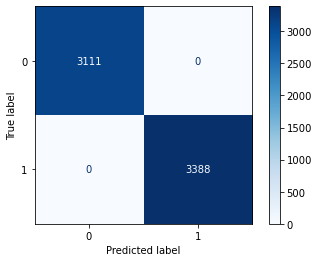

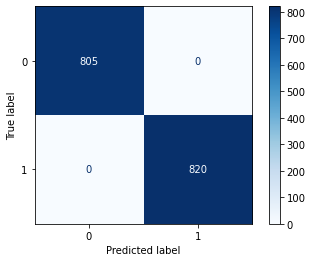

In [23]:
plot_confusion_matrix(tr, X_train, y_train, cmap="Blues")
plot_confusion_matrix(tr, X_test, y_test, cmap="Blues")

In [24]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

In [25]:
print(cm_train)
print(cm_test)

[[3111    0]
 [   0 3388]]
[[805   0]
 [  0 820]]


In [27]:
fpr, tpr, ths = roc_curve(y_test,  pred_test)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  pred_test)
prec = precision_score(y_test,  pred_test)
rec = recall_score(y_test,  pred_test)
acc = accuracy_score(y_test,  pred_test)
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)




F1: 1.00  -- prec: 1.00  -- recall: 1.00  -- acc: 1.00


## Higgs dataset

In [30]:
df = pd.read_csv("../../../data/higgs.csv")



/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df = df.apply(pd.to_numeric)



In [32]:
df.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [33]:
df["class"].value_counts()

1    51826
0    46223
Name: class, dtype: int64

In [34]:
y = df["class"]
X = df.iloc[:,1:]



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Decision Tree Classifier

In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
y_pred = clf.predict(X_test)

In [45]:
fpr, tpr, ths = roc_curve(y_test,  y_pred)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  y_pred)
prec = precision_score(y_test,  y_pred)
rec = recall_score(y_test,  y_pred)
acc = accuracy_score(y_test,  y_pred)
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)



F1: 0.65  -- prec: 0.64  -- recall: 0.66  -- acc: 0.63


[[5532 3750]
 [3534 6794]]


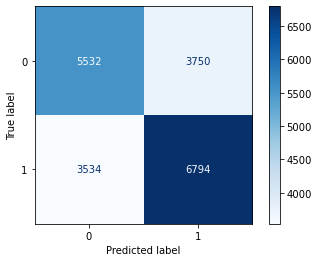

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [47]:
precision_score(y_test,y_pred)

0.6443474962063733

In [48]:
recall_score(y_test, y_pred)

0.6578233927188226

In [49]:
f1_score(y_test, y_pred)

0.6510157148332695

In [50]:
accuracy_score(y_test, y_pred)

0.628556858745538

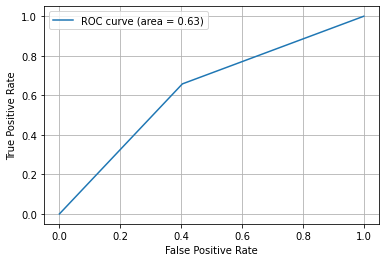

In [51]:
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [52]:
d = classification_report(y_test, y_pred,output_dict=True)

In [53]:
pd.DataFrame.from_dict(d)

,0,1,accuracy,macro avg,weighted avg
precision,0.610192,0.644347,0.628557,0.627270,0.628181
recall,0.595992,0.657823,0.628557,0.626908,0.628557
f1-score,0.603009,0.651016,0.628557,0.627012,0.628292
support,9282.000000,10328.000000,0.628557,19610.000000,19610.000000


## GridSearchCV

In [69]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[9,10,11,12], 
              'class_weight': ['balanced', None],'min_samples_split':[2,3,4,5], 
             }

parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2,3], 'min_samples_split':[2,3],
             'class_weight': ['balanced']}


tr2 = DecisionTreeClassifier()
gsearch = GridSearchCV(tr2, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [70]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Predictions and performance

In [71]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [72]:
fpr, tpr, ths = roc_curve(y_train,  y_pred_train)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_train,  y_pred_train)
prec = precision_score(y_train,  y_pred_train)
rec = recall_score(y_train,  y_pred_train)
acc = accuracy_score(y_train,  y_pred_train)
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)



F1: 0.60  -- prec: 0.71  -- recall: 0.52  -- acc: 0.63


In [73]:
fpr, tpr, ths = roc_curve(y_test,  y_pred)
auc_ = auc(fpr, tpr)
f1 = f1_score(y_test,  y_pred)
prec = precision_score(y_test,  y_pred)
rec = recall_score(y_test,  y_pred)
acc = accuracy_score(y_test,  y_pred)
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)




F1: 0.60  -- prec: 0.71  -- recall: 0.52  -- acc: 0.63


[[7088 2194]
 [4978 5350]]


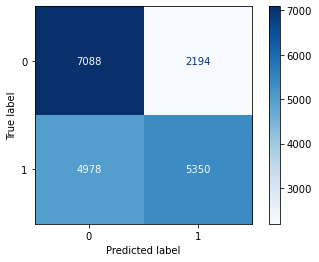

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)  
plt.show() 

[[28251  8690]
 [19962 21536]]


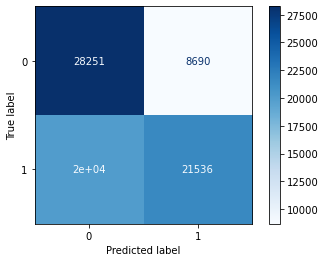

In [75]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
plot_confusion_matrix(model, X_train, y_train,cmap=plt.cm.Blues)  
plt.show() 